In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [22]:
# Load the dataset
path = 'C:/AI/DS.ML.Bootcamp/Assignments/Assignment 1/Data/processed.cleveland.csv'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

data = pd.read_csv(path, names=names)
print(data.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [23]:
data = data.replace('?', np.nan)  # Replace missing values with NaN
data = data.dropna()  # Drop rows with missing values
data[data.isna()]
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.946128  
std      0.994914   22.941562 

In [24]:
# Data preprocessing
data = data.replace('?', np.nan)  # Replace missing values with NaN
data = data.dropna()  # Drop rows with missing values
data['target'] = np.where(data['target'] > 0, 1, 0)  # Convert target to binary values
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]  # Target
#print(data.describe())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 33.6+ KB


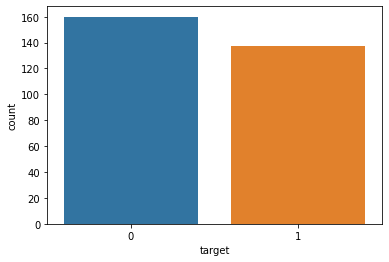

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=data)
plt.show()


<ipython-input-25-7e182af59855>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


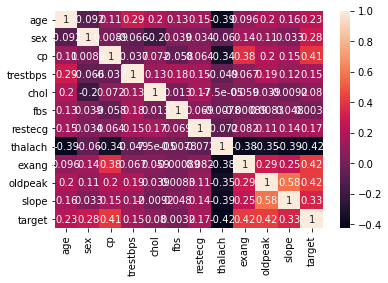

In [25]:

# b) Visualizing the correlation matrix:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()



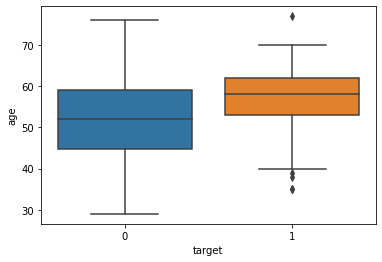

In [26]:

# d) Visualizing the relationship between age and target:
sns.boxplot(x="target", y="age", data=data)
plt.show()


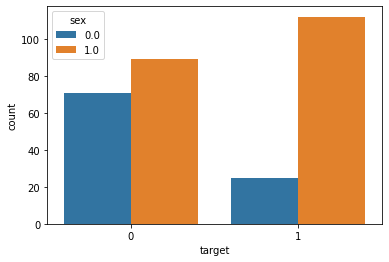

In [27]:

# e) Visualizing the relationship between sex and target:
sns.countplot(x="target", hue="sex", data=data)
plt.show()


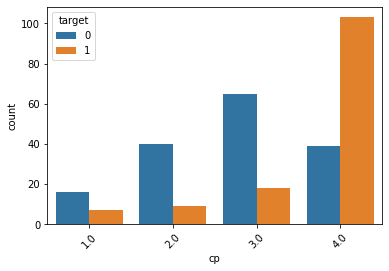

In [28]:

# f) Visualizing the relationship between chest pain type and target:
sns.countplot(x="cp", hue="target", data=data)
plt.xticks(rotation=45)
plt.show()

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

